## Step 3: Preparing data for training

**Objectives**
- 3.1. Importing daily scores from news folder
- 3.2. Importing daily stock data from stock folder
- 3.3. Merge both the imported data with date
- 3.4. Saving the merged data
- 3.5. Check data by plotting the graph

In [1]:
import pandas as pd
import json

import matplotlib.pyplot as plt

### 3.1. Importing daily scores from news folder

In [8]:
with open('./data/news2023/daily_scores.json', 'r') as file:
    sentimentScores = json.load(file)
#endwith

dfSentiment = pd.DataFrame(list(sentimentScores.items()), columns=['jsonDate', 'sentiment'])
dfSentiment['date'] = pd.to_datetime(dfSentiment['jsonDate'], format='%Y-%m-%d')
dfSentiment.head()

,jsonDate,sentiment,date
0,2023-01-01,"[0.3303655982017517, 0.18404191732406616, 0.17...",2023-01-01
1,2023-01-02,"[0.28398597240448, 0.18440347909927368, 0.1683...",2023-01-02
2,2023-01-03,"[0.30308911204338074, 0.1791391521692276, 0.17...",2023-01-03
3,2023-01-04,"[0.35545614361763, 0.20434696972370148, 0.1799...",2023-01-04
4,2023-01-05,"[0.4087914824485779, 0.19528710842132568, 0.14...",2023-01-05


### 3.2. Importing daily stock data from stock folder
- Data used will be of Habib Bank Limited (HBL)
- This bank is considered to be the top performing and one of the most profitable bank in the country [[Source: AsiaMoney](https://www.asiamoney.com/article/2bp0xnj0tjyfvvwhd8oow/awards/best-bank-awards/pakistans-best-domestic-bank-2023-hbl)]
- This bank has branches outside Pakistan as well

In [3]:
csvFilePath = './data/stocks2023/hbl.csv'
dfCsv = pd.read_csv(csvFilePath)
dfCsv.head()

,Symbol,Date,Open,High,Low,Close,Volume
0,HBL,2-Jan-23,63.40,64.85,62.75,64.51,958977.0
1,HBL,3-Jan-23,64.22,65.55,62.80,63.61,1449704.0
2,HBL,4-Jan-23,62.10,64.00,62.10,63.78,109780.0
3,HBL,5-Jan-23,64.70,64.80,63.00,64.55,199038.0
4,HBL,6-Jan-23,64.97,64.97,63.51,64.04,145546.0


### 3.3. Merge both the imported data with date

In [11]:
# dfCsv['date'] = pd.to_datetime(dfCsv['Date'], format='%d-%b-%y')
# print(dfCsv['date'])
# dfMerged = pd.merge(dfCsv, dfSentiment, on='date', how='left')
# dfSentimentColumns = pd.DataFrame(dfMerged['sentiment'].tolist(), columns=['feature1', 'feature2', 'feature3', 'feature4', 'feature5'])
# dfMerged = pd.concat([dfMerged, dfSentimentColumns], axis=1)

# dfMerged = dfMerged.drop(columns=['Symbol', 'date', 'sentiment', 'jsonDate'])
# dfMerged.head()

dfCsv['date'] = pd.to_datetime(dfCsv['Date'], format='%d-%b-%y')
dfSentiment['date'] = pd.to_datetime(dfSentiment['date'])

# Merge the DataFrames with left join to keep all dates from dfCsv
dfMerged = pd.merge(dfCsv, dfSentiment, on='date', how='left')

# Fill NaN values in 'sentiment' column with a default value (e.g., 0)
dfMerged['sentiment'].fillna(0, inplace=True)

# Split 'sentiment' column into multiple columns
sentiment_columns = dfMerged['sentiment'].apply(lambda x: pd.Series(x) if isinstance(x, list) else pd.Series([0]*5))
sentiment_columns.columns = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5']

# Concatenate the new columns with dfMerged
dfMerged = pd.concat([dfMerged, sentiment_columns], axis=1)

# Drop unnecessary columns
dfMerged.drop(columns=['Symbol', 'date', 'sentiment', 'jsonDate'], inplace=True)

# Display the resulting DataFrame
dfMerged.head()

C:\Users\HARIS\AppData\Local\Temp\ipykernel_6120\4259054859.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfMerged['sentiment'].fillna(0, inplace=True)


,Date,Open,High,Low,Close,Volume,feature1,feature2,feature3,feature4,feature5
0,2-Jan-23,63.40,64.85,62.75,64.51,958977.0,0.283986,0.184403,0.168337,0.175334,0.187939
1,3-Jan-23,64.22,65.55,62.80,63.61,1449704.0,0.303089,0.179139,0.172025,0.172861,0.172886
2,4-Jan-23,62.10,64.00,62.10,63.78,109780.0,0.355456,0.204347,0.179981,0.143462,0.116754
3,5-Jan-23,64.70,64.80,63.00,64.55,199038.0,0.408791,0.195287,0.143465,0.121123,0.131334
4,6-Jan-23,64.97,64.97,63.51,64.04,145546.0,0.356736,0.167279,0.145859,0.150348,0.179778


### 3.4. Saving the merged data
- Saving the file in CSV format ([hbl_feat.csv](./data/stocks2023/hbl_feat.csv))

In [12]:
outputCsvPath = './data/stocks2023/hbl_feat.csv'
dfMerged.to_csv(outputCsvPath, index=False)

### 3.5. Check data by plotting the graph

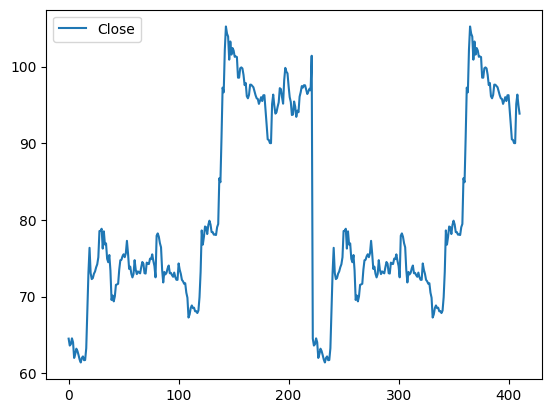

In [13]:
dfMerged[['Close']].plot()
plt.show()